In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
# (X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
(X_train, y_train), (X_test, y_test) = # data has been downloaded and kept in the folder with the name mnist.npz

11493376/11490434 [==============================] - 1057s 92us/step


In [3]:
len(X_train), len(y_train), len(X_test), len(y_test)

(60000, 60000, 10000, 10000)

In [4]:
# shape of one digit
X_train[0].shape

(28, 28)

In [5]:
# the data for a digit looks like
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

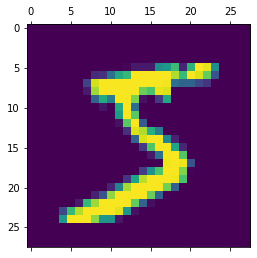

In [6]:
plt.matshow(X_train[0])

In [7]:
# the digit in the first place is
y_train[0]

5

In [8]:
# scaling the features for better model performance
X_train = X_train / 255
X_test = X_test / 255

In [9]:
# after scaling
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
# flatten the data for each digit for the first layer of the neural network
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [11]:
# shape after flattening the data
X_train_flattened.shape

(60000, 784)

##### Very simple neural network with no hidden layers

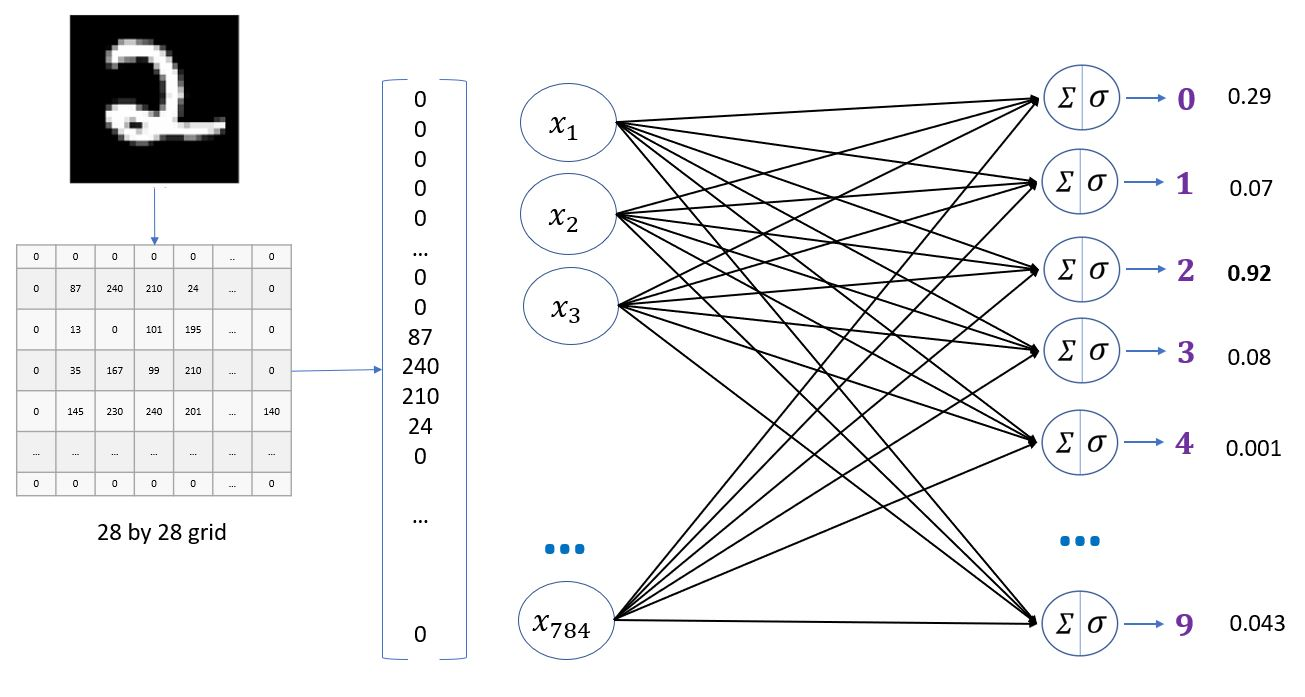

In [15]:
#Import library
from IPython.display import Image
# Load image from local storage
Image(filename = "digits_nn.jpg", width = 900, height = 700)

In [16]:
# creating a neural network with one layer and no hidden layers
# signoid is used as the activation function
# highly recommended is to use Relu as activation function for hidden layers, and sigmoid for final layer
# as the features have already been falttened, we do not do it here. otherwise keras supports flattening of the data

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

# loss here is sparse_categorical_crossentropy, because output is discrete like 5, 6 et.,
# loss is categorical_crossentropy when data one-hot encoded is like [0,0,0,0,0,1,0,0,0,0], [0,0,0,0,0,0,1,0,0,0] etc.,
# optimizer like SGD (stochastic gradient descent) can also be used instead of adam
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7248 - accuracy: 0.8110: 0s - loss: 0.768
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3060 - accuracy: 0.9148
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2851 - accuracy: 0.9194
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2773 - accuracy: 0.9246
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2612 - accuracy: 0.9274


In [17]:
# evaluating our model
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2684 - accuracy: 0.9262


[0.268394410610199, 0.9261999726295471]

In [18]:
# predicting the output for test set
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([3.2070398e-02, 4.1791998e-07, 8.2568884e-02, 9.3550646e-01,
       2.4184883e-03, 1.1629918e-01, 2.2084744e-06, 9.9978733e-01,
       8.7047040e-02, 6.9195271e-01], dtype=float32)

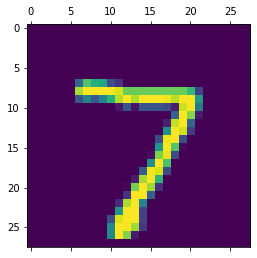

In [19]:
# first test data
plt.matshow(X_test[0])

#### np.argmax finds a maximum element from an array and returns the index of it

In [22]:
np.argmax(y_predicted[0])

7

In [23]:
# predcited labels
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [29]:
# test labels
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [30]:
# confusion matrix to depict output vs prediction
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    2,    0,    5,    6,    2,    1,    0],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   7,   10,  924,   15,    9,    4,   13,    9,   37,    4],
       [   4,    0,   20,  909,    0,   35,    2,   11,   21,    8],
       [   2,    1,    4,    1,  915,    0,   11,    4,   10,   34],
       [  10,    3,    3,   17,    8,  796,   17,    6,   25,    7],
       [  13,    3,    5,    1,    7,   12,  914,    2,    1,    0],
       [   1,    6,   24,    7,    6,    1,    0,  947,    2,   34],
       [   9,   10,    6,   21,    9,   28,    9,   10,  860,   12],
       [  11,    7,    1,   10,   24,    8,    0,   22,    4,  922]])>

Text(69.0, 0.5, 'Truth')

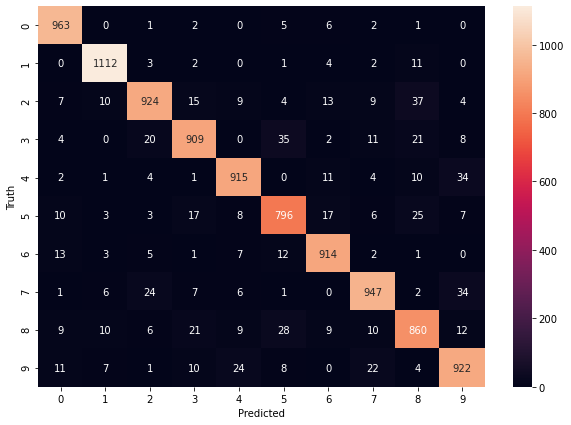

In [31]:
# using better visualization
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### Let us see if introduction of hidden layers improve the performance

In [33]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4554 - accuracy: 0.8747: 0s - loss: 0.4823 -  - ETA: 0s - loss: 0.4623 - accuracy
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1380 - accuracy: 0.9601
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0899 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0629 - accuracy: 0.9817
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0523 - accuracy: 0.9844


In [34]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0800 - accuracy: 0.9755


[0.08004680275917053, 0.9754999876022339]

Text(69.0, 0.5, 'Truth')

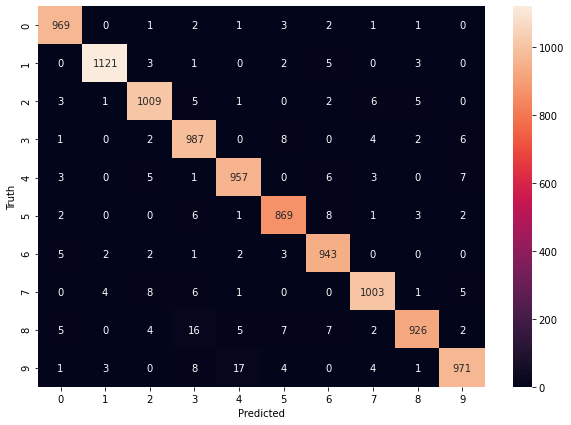

In [35]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

##### The model's performance has improved.
### Using Flatten layer so that we don't have to call .reshape on input dataset

In [36]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4537 - accuracy: 0.8767
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1331 - accuracy: 0.9608
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0889 - accuracy: 0.9746
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0665 - accuracy: 0.9799
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0511 - accuracy: 0.9844
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0403 - accuracy: 0.9881
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0327 - accuracy: 0.9908: 1s - los - ETA: 0s - loss: 0.0324 - 
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0256 - accuracy: 0.9923
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0227 - accuracy: 0.9931
Epoch 10/10
1875/1875 [=====================

In [37]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0793 - accuracy: 0.9776


[0.07931878417730331, 0.9775999784469604]